In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")   
%cd "/content/gdrive/MyDrive/AI_avanzada/reto_titanic/dababase"
!ls


Mounted at /content/gdrive
/content/gdrive/MyDrive/AI_avanzada/reto_titanic/dababase
gender_submission.csv  model5.h5		 submission_NNDecoder.csv
model0.h5	       submission2.csv		 submissionRF.csv
model1.h5	       submission_final1.csv	 submissionSVM.csv
model2.h5	       submission_final_new.csv  test.csv
model3.h5	       submissionKNN.csv	 train.csv
model4.h5	       submissionLR.csv


In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploración de datos

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


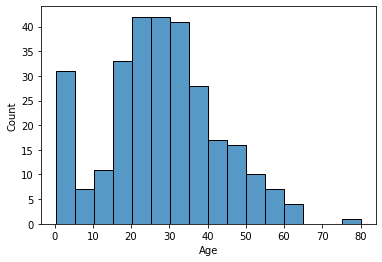

In [ ]:
sns.histplot(data=train_df[train_df.Survived == 1], x="Age")

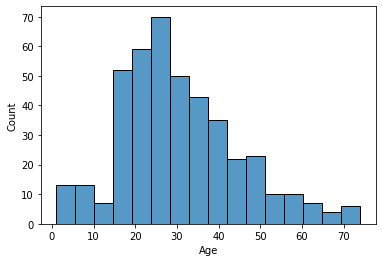

In [ ]:
sns.histplot(data=train_df[train_df.Survived == 0], x="Age")

In [ ]:
train_df[["Sex","Pclass","Survived"]].groupby(["Sex","Pclass"]).mean().sort_values(by='Survived', ascending=False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

En todos los casos, podemos ver que las mujeres tienen mucha mayor probabilidad de sobrevivir que los hombres, por lo que podemos decir que estan correlacionados

In [ ]:
train_df[["Sex","Embarked","Survived"]].groupby(["Sex","Embarked"]).mean().sort_values(by='Survived', ascending=False)

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       S         0.174603
       Q         0.073171

#Transformación de datos

In [ ]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in big_string:
            return substring
    return "None"

In [ ]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer']
train_df['Title']=train_df['Name'].map(lambda x: substrings_in_string(x, title_list))

In [ ]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Major,0,2
Master,0,40
Miss,180,0


Solo vamos a agarrar aquellos titulos que son mas recurrentes, ya que el resto son muy pocos los registros que los llevan y no generaria un cambio significante en el entrenamiento del modelo

In [ ]:
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,182,0
Mr,0,518
Mrs,130,0
Rare,2,19


In [ ]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.703297
2,Mr,0.158301
3,Mrs,0.792308
4,Rare,0.285714


In [ ]:
factorized_title = pd.factorize(train_df["Title"])
train_df["Title"] = factorized_title[0]
for i in range(len(factorized_title[1])):
  print(factorized_title[1][i], "=", i)
print("-"*20)
train_df.head()

Mr = 0
Mrs = 1
Miss = 2
Master = 3
Rare = 4
--------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
factorized_sex = pd.factorize(train_df["Sex"])
train_df["Sex"] = factorized_sex[0]
for i in range(len(factorized_sex[1])):
  print(factorized_sex[1][i], "=", i)
print("-"*20)
train_df.head()

male = 0
female = 1
--------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


Vamos a llenar los datos faltantes de edad basandonos en el sexo y la clase de la persona 

In [ ]:
train_df[["Age", "Sex", "Pclass"]].groupby(["Sex", "Pclass"]).describe()

Age                                                       
            count       mean        std   min     25%   50%    75%   max
Sex Pclass                                                              
0   1       101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
    2        99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
    3       253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0
1   1        85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
    2        74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
    3       102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0

In [ ]:
train_df["Age"] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(np.random.normal(x.median(), x.std()))).astype(int)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,S,4
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,12,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C148,C,0


In [ ]:
factorized_sex = pd.factorize(train_df["Embarked"])
train_df["Embarked"] = factorized_sex[0]
for i in range(len(factorized_sex[1])):
  print(factorized_sex[1][i], "=", i)
print("-"*20)
train_df.head()

S = 0
C = 1
Q = 2
--------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,0


In [ ]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
#Ahora si dropeamos todas las columnas que no vamos a usar
train_df = train_df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis = 1)
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,22,7.2500,0,0,2
1,1,1,1,38,71.2833,1,1,2
2,1,3,1,26,7.9250,0,2,1
3,1,1,1,35,53.1000,0,1,2
4,0,3,0,35,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27,13.0000,0,4,1
887,1,1,1,19,30.0000,0,2,1
888,0,3,1,12,23.4500,0,2,4
889,1,1,0,26,30.0000,1,0,1


#Escalado de los datos

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
#Solo queremos normalizar Age y Fare
train_df[['Age', 'Fare']] = min_max_scaler.fit_transform(train_df[["Age", "Fare"]])
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,0.2750,0.014151,0,0,2
1,1,1,1,0.4750,0.139136,1,1,2
2,1,3,1,0.3250,0.015469,0,2,1
3,1,1,1,0.4375,0.103644,0,1,2
4,0,3,0,0.4375,0.015713,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,0,0.3375,0.025374,0,4,1
887,1,1,1,0.2375,0.058556,0,2,1
888,0,3,1,0.1500,0.045771,0,2,4
889,1,1,0,0.3250,0.058556,1,0,1


#Misma Limpieza a test_df

In [ ]:
#vamos a ir por columna, con el objetivo que tengamos la misma estructura que train_df
sex_map = {'male': 0, 'female': 1}
test_df["Sex"] = test_df["Sex"].apply(lambda x: sex_map[x])
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test_df['Title']=test_df['Name'].map(lambda x: substrings_in_string(x, title_list))
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

title_map = {'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3, 'Rare' : 4}
test_df['Title']=test_df['Title'].apply(lambda x: title_map[x])
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,4
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,0


In [ ]:
test_df = test_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,Q,0
1,3,1,47.0,1,0,7.0000,S,1
2,2,0,62.0,0,0,9.6875,Q,0
3,3,0,27.0,0,0,8.6625,S,0
4,3,1,22.0,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,S,0
414,1,1,39.0,0,0,108.9000,C,4
415,3,0,38.5,0,0,7.2500,S,0
416,3,0,NaN,0,0,8.0500,S,0


In [ ]:
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,0,34.5,0,0,7.8292,Q,0,1
1,3,1,47.0,1,0,7.0000,S,1,2
2,2,0,62.0,0,0,9.6875,Q,0,1
3,3,0,27.0,0,0,8.6625,S,0,1
4,3,1,22.0,1,1,12.2875,S,1,3
...,...,...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,S,0,1
414,1,1,39.0,0,0,108.9000,C,4,1
415,3,0,38.5,0,0,7.2500,S,0,1
416,3,0,NaN,0,0,8.0500,S,0,1


In [ ]:
test_df = test_df.drop(["SibSp", "Parch"], axis=1)
test_df

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,34.5,7.8292,Q,0,1
1,3,1,47.0,7.0000,S,1,2
2,2,0,62.0,9.6875,Q,0,1
3,3,0,27.0,8.6625,S,0,1
4,3,1,22.0,12.2875,S,1,3
...,...,...,...,...,...,...,...
413,3,0,NaN,8.0500,S,0,1
414,1,1,39.0,108.9000,C,4,1
415,3,0,38.5,7.2500,S,0,1
416,3,0,NaN,8.0500,S,0,1


In [ ]:
embarked_map = {"S": 0, "C": 1, "Q": 2}
test_df['Embarked']=test_df['Embarked'].apply(lambda x: embarked_map[x])
test_df

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,34.5,7.8292,2,0,1
1,3,1,47.0,7.0000,0,1,2
2,2,0,62.0,9.6875,2,0,1
3,3,0,27.0,8.6625,0,0,1
4,3,1,22.0,12.2875,0,1,3
...,...,...,...,...,...,...,...
413,3,0,NaN,8.0500,0,0,1
414,1,1,39.0,108.9000,1,4,1
415,3,0,38.5,7.2500,0,0,1
416,3,0,NaN,8.0500,0,0,1


In [ ]:
test_df["Age"] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(np.random.normal(x.median(), x.std()))).astype(int)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Embarked    418 non-null    int64  
 5   Title       418 non-null    int64  
 6   FamilySize  418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [ ]:
test_df[test_df["Fare"].isna()]

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
152,3,0,60,NaN,0,0,1


In [ ]:
#Podemos ver que es 3era clase y hombre, por lo que podemos calcular la media de los pasajeros que cumplen con eso y asi llenar este valor
fare_means = test_df.groupby(['Sex', 'Pclass'])['Fare'].mean()
fare_means

Sex  Pclass
0    1          75.586551
     2          20.184654
     3          11.826350
1    1         115.591168
     2          26.438750
     3          13.735129
Name: Fare, dtype: float64

In [ ]:
test_df["Fare"] = test_df["Fare"].fillna(fare_means[0,3])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Embarked    418 non-null    int64  
 5   Title       418 non-null    int64  
 6   FamilySize  418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [ ]:
#Solo queremos normalizar Age y Fare
test_df[['Age', 'Fare']] = min_max_scaler.fit_transform(test_df[["Age", "Fare"]])
test_df

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,0.447368,0.015282,2,0,1
1,3,1,0.618421,0.013663,0,1,2
2,2,0,0.815789,0.018909,2,0,1
3,3,0,0.355263,0.016908,0,0,1
4,3,1,0.289474,0.023984,0,1,3
...,...,...,...,...,...,...,...
413,3,0,0.302632,0.015713,0,0,1
414,1,1,0.513158,0.212559,1,4,1
415,3,0,0.500000,0.014151,0,0,1
416,3,0,0.302632,0.015713,0,0,1


#Modelado y predicciones

In [ ]:
from sklearn.model_selection import train_test_split
X = train_df[train_df.columns[1:]]
y = train_df["Survived"]
X

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,0.2750,0.014151,0,0,2
1,1,1,0.4750,0.139136,1,1,2
2,3,1,0.3250,0.015469,0,2,1
3,1,1,0.4375,0.103644,0,1,2
4,3,0,0.4375,0.015713,0,0,1
...,...,...,...,...,...,...,...
886,2,0,0.3375,0.025374,0,4,1
887,1,1,0.2375,0.058556,0,2,1
888,3,1,0.1500,0.045771,0,2,4
889,1,0,0.3250,0.058556,1,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred)
acc_log

0.7821229050279329

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.199692
3,Fare,0.766655
5,Title,0.341343
4,Embarked,0.147198
6,FamilySize,-0.241972
0,Pclass,-0.952588
2,Age,-1.565069


In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred)
acc_svc

0.8212290502793296

In [ ]:
#K Neighbors

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
acc_knn

0.8100558659217877

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, y_pred)
acc_decision_tree

0.776536312849162

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = accuracy_score(y_test, y_pred)
acc_random_forest

0.8268156424581006

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.826816
0,Support Vector Machines,0.821229
1,KNN,0.810056
2,Logistic Regression,0.782123
4,Decision Tree,0.776536


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

from keras.models import Sequential
from keras.layers import MaxPooling2D, Dropout, Dense, Flatten
from keras import regularizers

In [ ]:
X_train.shape

(712, 7)

In [ ]:
keras.backend.clear_session()

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(8, input_shape=(7,), activation='relu'))
#model.add(Dense(16, activation='relu', kernel_regularizer = "l1"))
model.add(Dense(16, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu', kernel_regularizer = "l2"))
model.add(Dense(32, activation='relu', kernel_regularizer='l1'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=30, validation_data=(X_test,y_test))

In [ ]:
plt.plot(history.history['accuracy'], 'bo')
plt.plot(history.history['val_accuracy'], 'rX')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()
plt.plot (history.history['loss'], 'bo')
plt.plot(history.history['val_loss'], 'rx')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()

In [ ]:
test_crudo = pd.read_csv("test.csv")
predict = model.predict(test_df)
submission = pd.DataFrame()
submission["PassengerId"] = test_crudo["PassengerId"]
submission["Survived"] = predict.round().astype(int)
submission
submission.to_csv("submission_NNDecoder.csv", index = False)

In [ ]:
test_crudo = pd.read_csv("test.csv")
predict = random_forest.predict(test_df)
submission = pd.DataFrame()
submission["PassengerId"] = test_crudo["PassengerId"]
submission["Survived"] = predict.round().astype(int)
submission
submission.to_csv("submissionRF.csv", index = False)

In [ ]:
test_crudo = pd.read_csv("test.csv")
predict = knn.predict(test_df)
submission = pd.DataFrame()
submission["PassengerId"] = test_crudo["PassengerId"]
submission["Survived"] = predict.round().astype(int)
submission
submission.to_csv("submissionKNN.csv", index = False)

In [ ]:
test_crudo = pd.read_csv("test.csv")
predict = svc.predict(test_df)
submission = pd.DataFrame()
submission["PassengerId"] = test_crudo["PassengerId"]
submission["Survived"] = predict.round().astype(int)
submission
submission.to_csv("submissionSVM.csv", index = False)

In [ ]:
test_crudo = pd.read_csv("test.csv")
predict = logreg.predict(test_df)
submission = pd.DataFrame()
submission["PassengerId"] = test_crudo["PassengerId"]
submission["Survived"] = predict.round().astype(int)
submission
submission.to_csv("submissionLR.csv", index = False)